# COGS 118A-Final Project

#Diabetes Classifications Using Surpervised Machine Learning Models

# Group Members

- Yutong Guo
- Yuxuan Che
- Ethan Hu
- Qilun Liu
- Zhihan Li


# Abstract
The goal of this study is to effectively employ machine learning algorithms to classify individuals as either diabetic or non-diabetic utilizing a dataset consisting of 21 quantitative health indicators collected from both diabetic and non-diabetic individuals, including variables such as BMI, high blood pressure, and high cholesterol. The dataset we use is a clean dataset of 70,692 survey responses initially released by the Centers for Disease Control and Prevention (CDC) in 2015. The survey collects data about U.S. residents regarding their health-related risk behaviors, chronic health conditions, and use of preventive services. In our solution, feature selection is performed to reduce noise in the dataset; Random forest, gradient boosting, support vector machine, logistic regression, and naive Bayes models are employed; the performance of the model is evaluated using metrics such as accuracy, precision, recall, and F1-score, and the prediction results are visually depicted through a confusion matrix. From our testings, random forest and gradient boosting had the best performance in classifying diabetic patients, with 0.75 accuracy and 0.79 recall rate. The top 3 imporant features derived from the random forest algorithm are general health condition, blood pressure, and BMI.

# Background
Diabetes is a chronic medical condition characterized by high blood sugar levels. It occurs when the body either doesn't produce enough insulin (a hormone that helps regulate blood sugar) or cannot effectively use the insulin it produces<a name="PharmEasy"></a>[<sup>[1]</sup>](#PharmEasy)
. Two of the most common diabetes are Type I diabetes and Type II diabetes. Although the cause of Type I remains unclear, the risk of Type 2 diabetes is strongly associated with lifestyle choices.

In modern times, various factors stemming from the urban lifestyle contribute to an increasing prevalence of diabetes. According to the research, “the prevalence of diabetes is “higher in urban (10.8%) than rural (7.2%) areas, and in high-income (10.4%) than low-income countries (4.0%)”, which reveals that urbanized lifestyle might have been the cause<a name="Saeedi"></a>[<sup>[2]</sup>](#Saeedi)
. Even more concerning, as urbanization continues, it exposes more people to a higher risk of diabetes. According to a diabetes population projection from the research, “the global diabetes prevalence in 2019 is estimated to be 9.3% (463 million people), rising to 10.2% (578 million) by 2030 and 10.9% (700 million) by 2045”<a name="Saeedi"></a>[<sup>[2]</sup>](#Saeedi)
. This indicates that the percentage of the diabetes population will continue to rise. It is also worth noting that, among the existing cases, an estimated 50.1% of the patients who lived with diabetes are unaware of their illness<a name="Saeedi"></a>[<sup>[2]</sup>](#Saeedi)
. The increasing prevalence and the low awareness of diabetes catch our attention and promote us to find a way to protect people against the risk of further illness development.

We believe that an effective way for individuals to maintain good health is through efficient diabetes diagnosis. This is evidenced by the US Preventive Services Task Force’s finding that screening for Type II diabetes or prediabetes has a positive relationship with reducing the risk of mortality and cardiovascular morbidity<a name="Force"></a></a>[<sup>[3]</sup>](#Force)
. However, the issue is that, although Type II diabetes is primarily diagnosed by measuring blood sugar levels, individuals who are not part of the diagnosed group may not regularly consider this parameter in their daily lives. Therefore, it is essential to utilize other widely used health measurements, such as BMI, blood pressure, and cholesterol levels, as well as habits and demographic information that contribute to health, such as smoking and income level, as important indicators for individuals to regularly assess their risk of developing diabetes. These measurements can serve as crucial reminders for individuals to monitor their health. In addition to effective diagnostics, we aim to determine which among the commonly accessible health indicators and measurements mentioned above may contribute more to the development of Type II diabetes. This is because concluding these factors can not only enhance the machine learning diagnostic system but also assist individuals in making informed decisions to improve their health by adopting appropriate lifestyle choices.


# Problem Statement

The accurate distinction between diabetic patients and non-diabetic individuals depends on various factors. These factors encompass health measurements like BMI and blood pressure, as well as habits and demographic information that can influence a person's health, such as smoking, age, and income. Therefore, the crucial aspect of developing an accurate machine learning prediction system lies in identifying the most efficient combinations of algorithms and health indicators.

Our goal is to create a binary classification model where the input includes various health indicators collected from patients and non-patients and the output is either diabetic or non-diabetic. Feature selection will be applied to reduce noise in the dataset and improve the accuracy of predictions. The collected health indicators will serve as inputs to our machine learning algorithms, including random forest, gradient boosting, support vector machine, logistic regression, and naive Bayes. The performance of each model will be assessed using error metrics, including accuracy, precision, recall, and F1-score. Additionally, a confusion matrix will be generated for each model to provide a visualized summary of its performance. This matrix will help evaluate how well the model predicts true positives, false positives, true negatives, and false negatives, aiding in a comprehensive understanding of the model's performance. The public can replicate our study by accessing the open-source data we used and examining our model with the publicly available code we have published.


# Data

Link to data: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?select=diabetes_binary_5050split_health_indicators_BRFSS2015.csv

This dataset contains 21 diabetes health indicator variables with 70k valid observation data. Each observation is a survey response from a non/diabetes person responding to the questions which is later cleaned and labeled into the 21 different variables, the variables include health and demographic information like: BMI, stoke, smoker, fruit, veggies, general, mental, physical health, age, sex, etc. Some of the critical variables are high blood pressure (binary), high cholesterol (binary), age (ratio), consume vegetables 1 or more times per day (binary), income rated from 1-10 interval (interval), etc. These are some of the more important variables that might have a larger influence on whether a person gets diabetes. There are 2 types of result data: non/diabetes, and we are hoping to build a model using binary classification. The original survey includes more observations, but we choose to use this dataset, since this dataset is balanced with same number of diabetic patients and non-diabetic people. Otherwise, all the data is cleaned, and all categorical data are already transferred to numerical ones using one-hot-encoding.


After data cleaning, we chose to set up as follows:

Size of the dataset: 70692 sample sizes in total, with the possibility of outliers involved.

Observation: Each observation in this dataset represents a person who aged between the range from 18 to 80 or older about his physical behavior.

Critical Variables: Among the 21 variables, we specificaly focus on 'HighBP', 'CholCheck', 'BMI', 'HvyAlcoholConsump', 'GenHlth', 'Age'. So 6 critical variables.

Special Handling/Transformations/Cleaning: We normalized all the data entries into the scale between 0 to 1.

Data Preprocessing and cleaning: we wanna use L2 norm to demonstrate our feature, and some of the variables' need to switch to binary output.





In [ ]:
# setup
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
# load balanced diebetes binary dataset
url = "https://raw.githubusercontent.com/COGS118A/Group016-SP23/main/diabetes50.csv"
df = pd.read_csv(url)
diabetes=(df-df.min())/(df.max()-df.min())
diabetes



,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.50,0.166667,1.000000,0.0,1.0,0.250000,1.0,1.000000
1,0.0,1.0,1.0,1.0,0.162791,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.50,0.000000,0.000000,0.0,1.0,0.916667,1.0,1.000000
2,0.0,0.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.00,0.000000,0.333333,0.0,1.0,1.000000,1.0,1.000000
3,0.0,1.0,1.0,1.0,0.186047,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.50,0.000000,0.100000,0.0,1.0,0.833333,1.0,1.000000
4,0.0,0.0,0.0,1.0,0.197674,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.000000,0.000000,0.0,0.0,0.583333,0.8,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,0.290698,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.75,0.000000,0.000000,0.0,0.0,0.416667,0.6,0.000000
70688,1.0,0.0,1.0,1.0,0.197674,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.25,0.000000,0.000000,1.0,1.0,0.750000,0.4,0.714286
70689,1.0,1.0,1.0,1.0,0.151163,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.00,0.500000,0.000000,1.0,0.0,1.000000,1.0,0.428571
70690,1.0,1.0,1.0,1.0,0.069767,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.75,0.000000,0.000000,1.0,0.0,0.833333,0.2,0.428571


# Proposed Solution

There should be a clear distinction between diabetic patients and non-diabetic people, and it should have a high precision rate, recall rate, and f1 score for generally all classification machine learning methods, since there are large enough variables and observations for learning.
Logistic regression should work well, but the linearity between variables and result indices are not checked, which may lead to inaccurate results. The precision rate ,recall rate and f1 score will be examined and compared among different models.
This solution is applicable to all American people. Because this dataset only contains data on a national base. This dataset is large enough to be representative to all populations contained in the dataset. Since all indicators we are using are important health indicators, the solutions should have a true meaning and be applicable.

# Evaluation Metrics

Since our project aims to build a machine learning model that can correctly identify individuals that are considered high-risk in getting diabetes, we want to have a high accuracy, but also since we do not want to miss anyone who has diabetes, one of the most important metrics for our project is the Recall rate. Recall = TP / (TP + FN), where we want to identify as much positive as possible among the population. Thus, we want to compare our model’s Recall rate with the benchmark model to analyze if there is a significant improvement in the model. Although Recall score is extremely important as an evaluation metric, we also want to put some emphasis on precision as well. Precision = TP / (TP + FP), it measures the proportion of correctly predicted positive instances (diabetics) out of all instances predicted as positive.
Since both metrics are important, we can combine them to produce a f1 score test as our final evaluation metrics. F1 Score = 2 * (Precision * Recall) / (Precision + Recall), it combines precision and recall into a single metric, providing a balanced measure of a model's performance. Thus, this can be one of the more ideal metrics for our project.
To test the metrics, since there is a large enough data, we plan to use the regular Train/Validate/Test split for both our model and the benchmark model and compare the f1 score for both models. We hope to see a higher f1 score from our model compared to the benchmark model.

# Results

The full code can be found here: https://github.com/COGS118A/Group016-SP23/blob/main/Project_Code.ipynb

### Performance of benchmark model: Naive Bayes

As explained above, we chose Naive Bayes as our benchmark model.
1. Training <br>
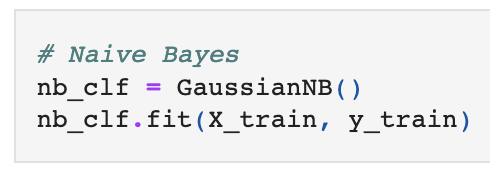<br>
We used a basic train fit for our benchmark Narive Bayes model since there are no parameter for us to tune.
2. Classification Result <br>
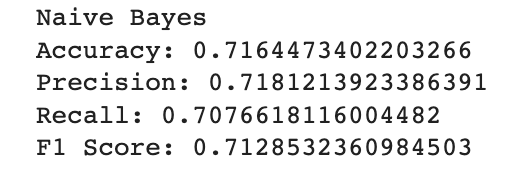 <br>
For our benchmark model, we can se that it is already doing fairly well with 0.712 f1 score which we are using as our evaluation metrics. It also has a pretty well rounded accuracy, precision, and recall score of around 0.7. Since Naive Bayes model is a pretty simple model, we are looking forward to try other models as they will have a better performance. Since we have a perfectly balanced dataset, we are expecting to have a ralative high f1 score, but other more complex models are expected to have a bump in performance. This is indicatign that there are some independence between feasures as assumed by Naive Bayes, but other features might be connected.
3. Confusion Matrix <br>
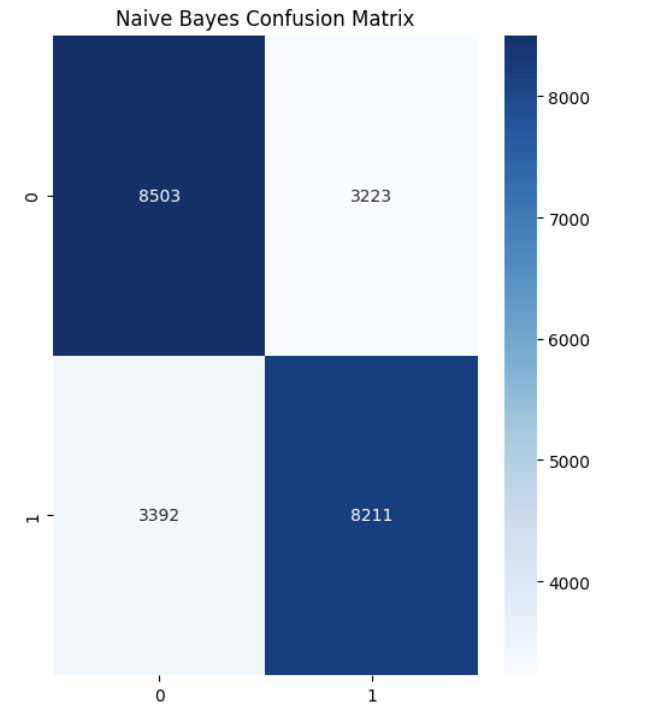 <br>
As we can see, there is a pretty balanced distribution beteween false positive prediction and false negative predition, as well as correct positive and negative predictions.

### Performance Model 2: Random Forest

1. Training <br>
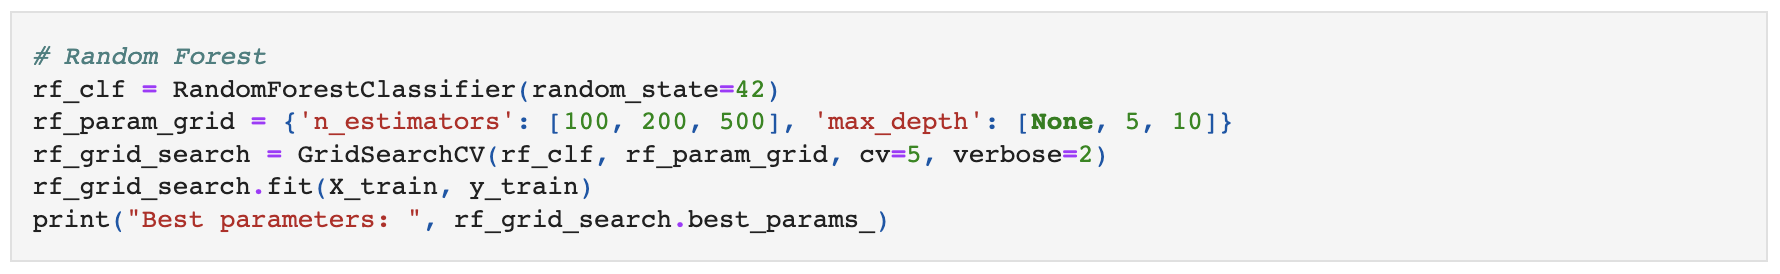<br>
We used grid seach cross validation to tune the parameters for our Random Forest model, we checked for 3 different numbers of trees in the forest and 3 different parameter for max depth. The best model, as expected, had the largest estimator of 500 and a max depth of 10.
2. Classification Result<br>
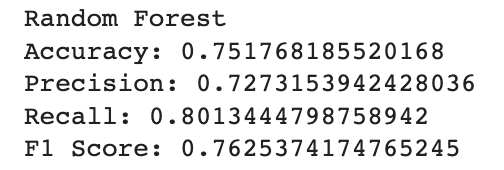 <br>
As we can see, we had a huge incease in our performace as indicated by the f1 score of 0.763, and one of our most important metrics: recall reached 0.8. This is achieved becasue Random Forest can capture complex relationships and interactions between features, while Naive Bayes assumes feature independence given the class label.
3. Confision Matrix<br>
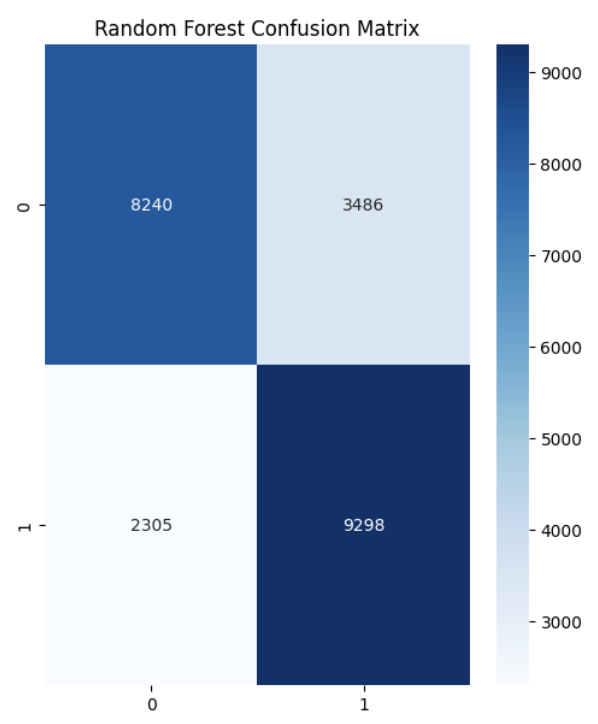 <br>
As we can see in the matrix, the false negative rate is reduced, and a lot more labels are getting predicted correctly.
4. Feature Importance <br>
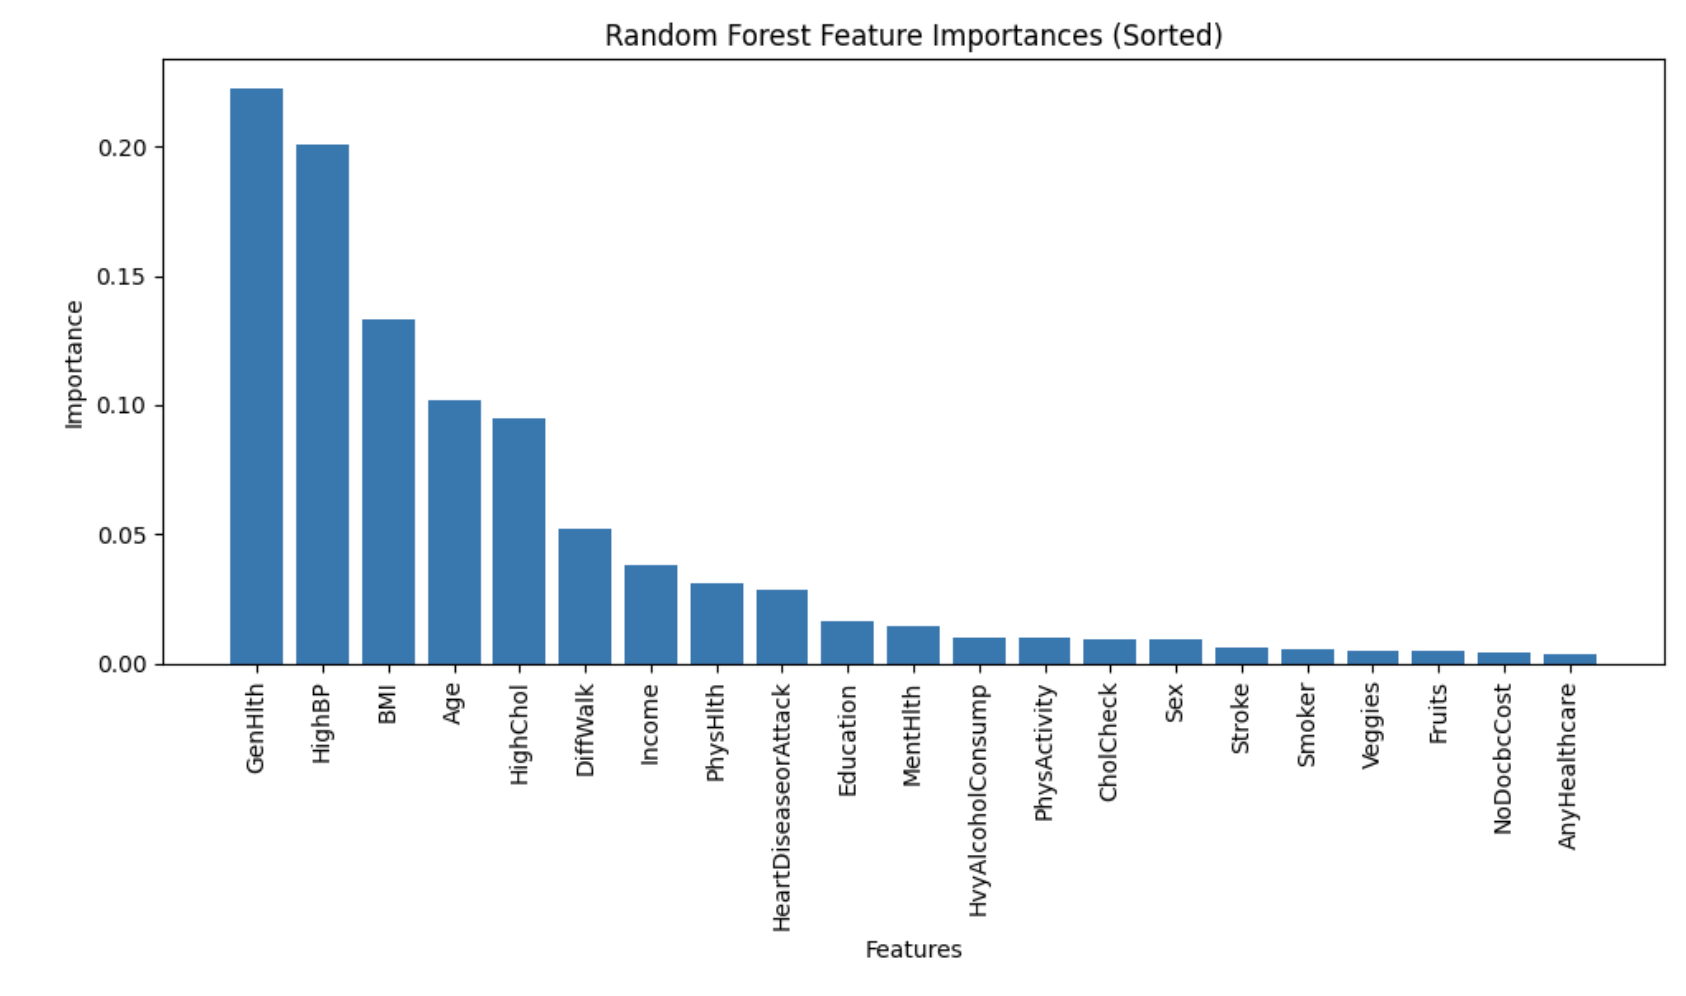<br>
We also used the feature importance function of Random Forest to investigate which feature was more important to out Random Forest model and as we can see in the results, 'GenHealth', 'HighBP', and 'BMI' are some of the most important features.

### Performance Model 3: Support Vector Machine

1. Training <br>
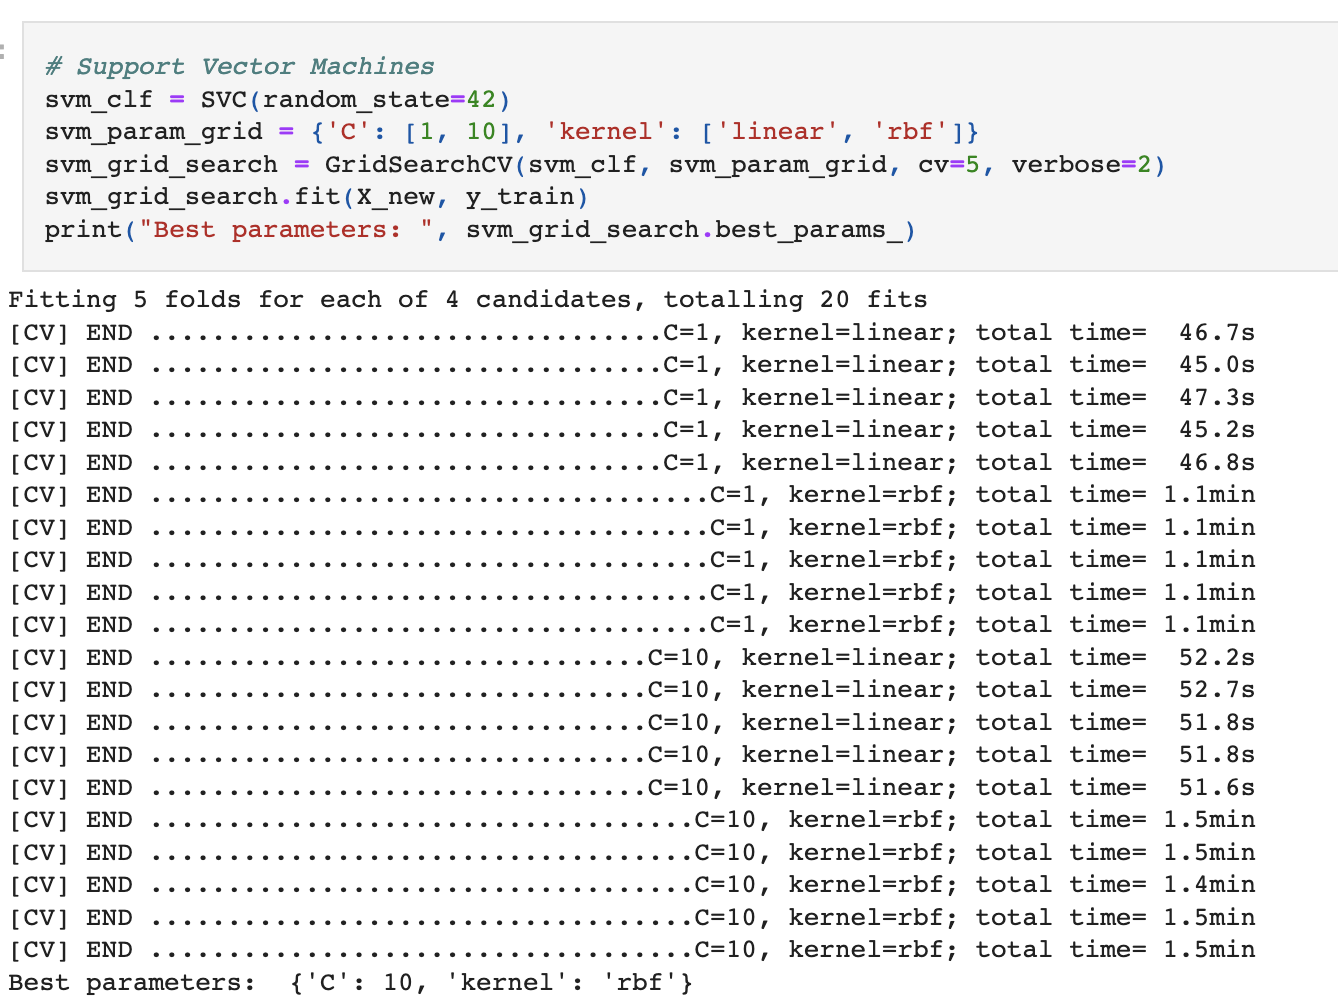 <br>
We used grid seach cross validation to tune the parameters for our Support Vector Machine model, we checked for 2 different C value and 2 different kernel. The best parameter is C = 10, and a rbf kernel. This is probably because most of the training data is hard to be seperated by a single linear boundary.
2. Classification Result<br>
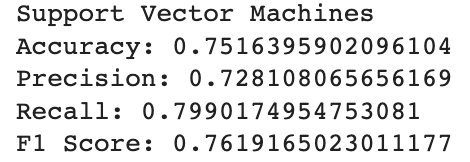 <br>
As we can see, we had a huge incease in our performace as indicaated by the f1 score of 0.762. This is achieved becasue SVM is generally robust to irrelevant features in the dataset. It focuses on the support vectors, which are the instances closest to the decision boundary, to determine the decision function.
3. Confision Matrix<br>
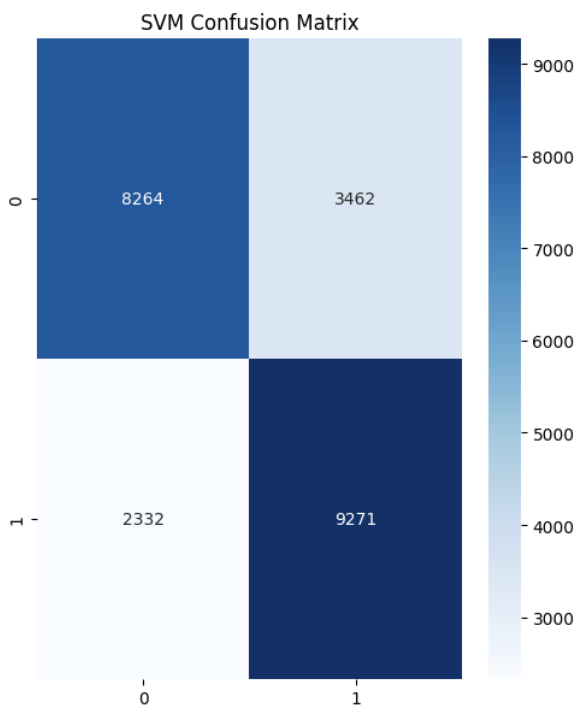 <br>
As we can see in the matrix, the false negative rate is reduced, and a lot more labels are getting predicted correctly, very similar to Random Forest's confusion matrix.
4. Feature Selection<br>
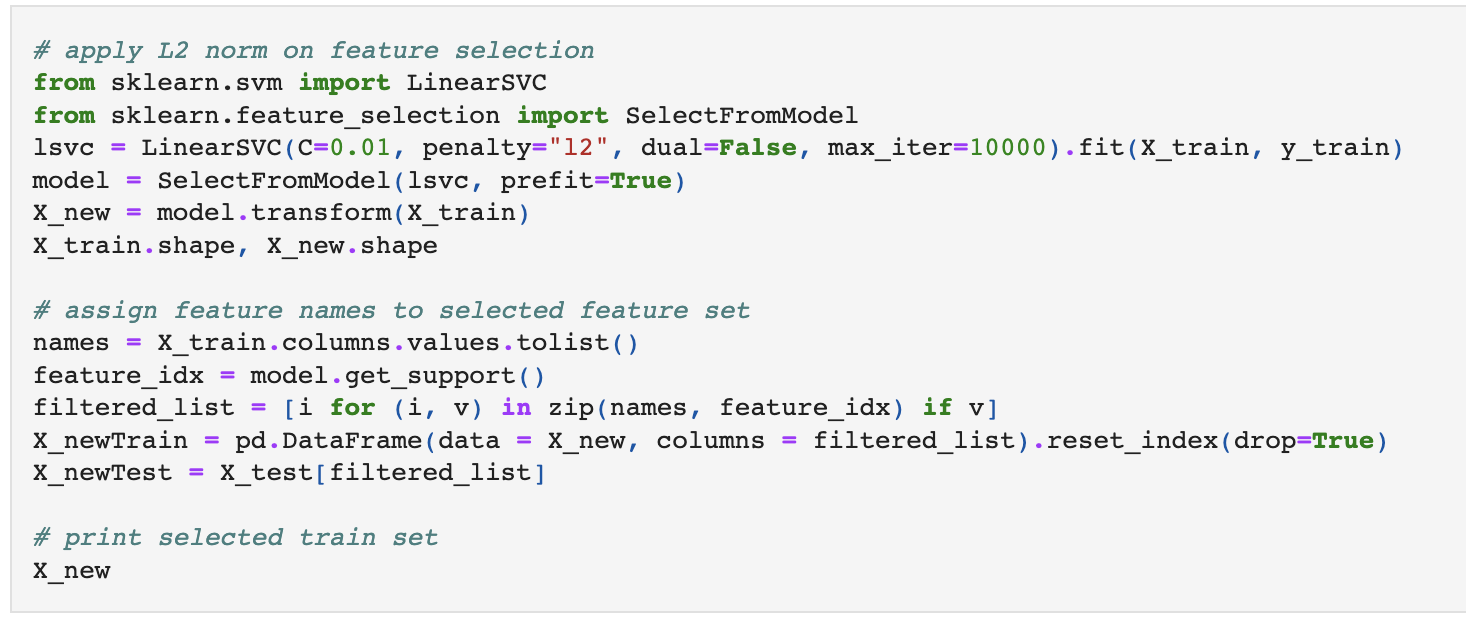 <br>
We also competed a feature selection for our SVM model and selected to only run with important features which include: HighBP', 'CholCheck', 'BMI', 'HvyAlcoholConsump', 'GenHlth', 'Age'. This list is a bit different from the feature importance list by Random Forest, but there are a lot of features that are in common between the two.

### Performance Model 4: Logistic Regression

1. Training <br>
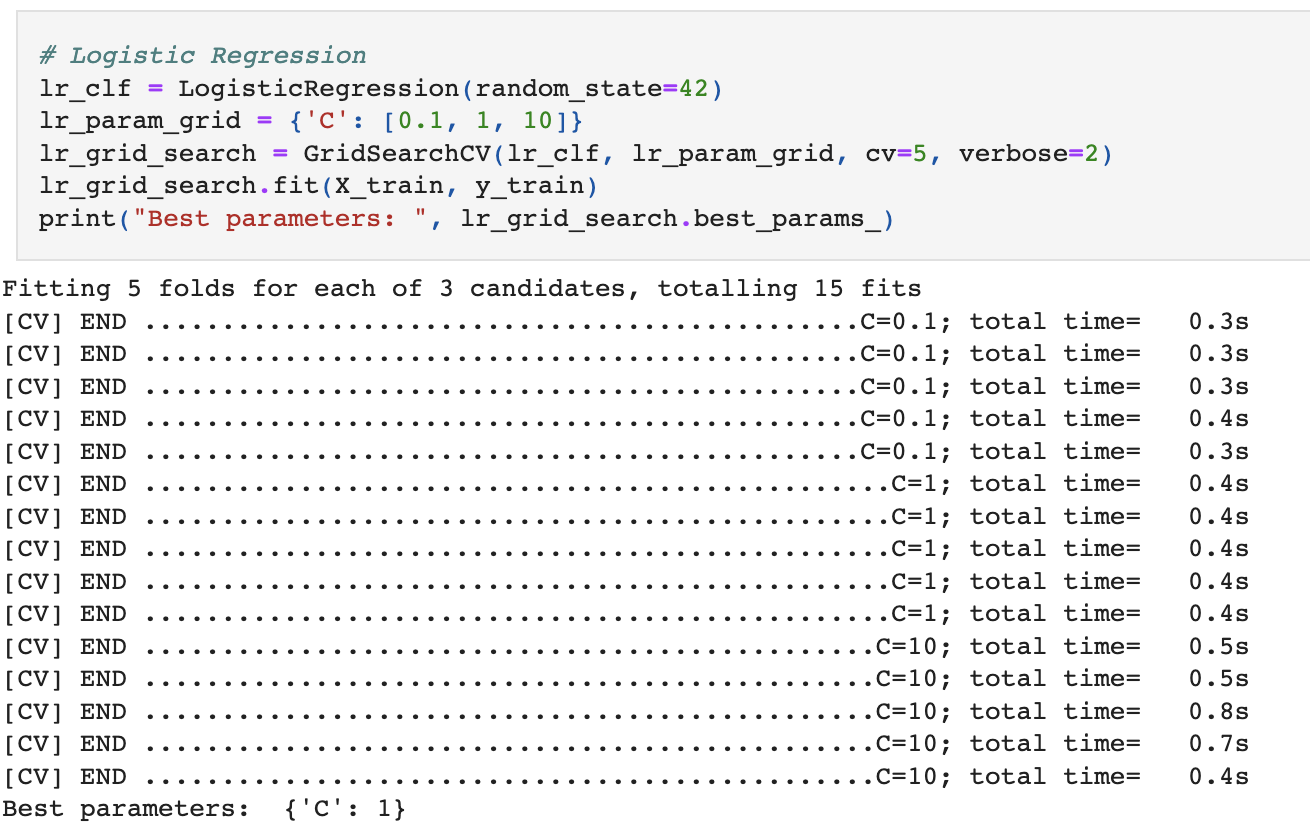<br>
We used grid seach cross validation to tune the parameters for our Logistic Regression model, we checked for 3 different C value. The best parameter is the middle C value that we trained with, a value of 1.
2. Classification Result<br>
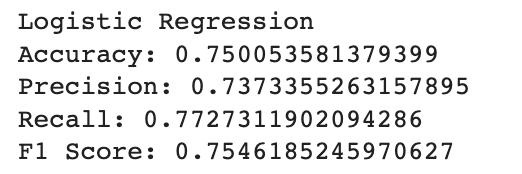<br>
As we can see, we had a incease in our performace as indicaated by the f1 score of 0.755. This is achieved becasue Logistic Regression can handle both continuous and categorical features effectively.
3. Confision Matrix<br>
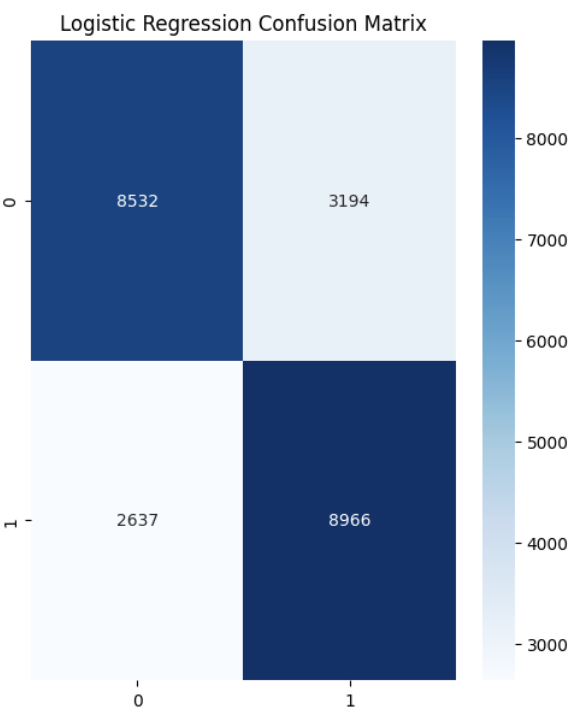<br>
As we can see in the matrix, although it is not performing at the level or Random Forest or SVM, the false negative rate is still reduced by a lot, and a lot more labels are getting predicted correctly compared to the benchmark model.


### Best Performing Model: Gradient Boosting

1. Training<br>
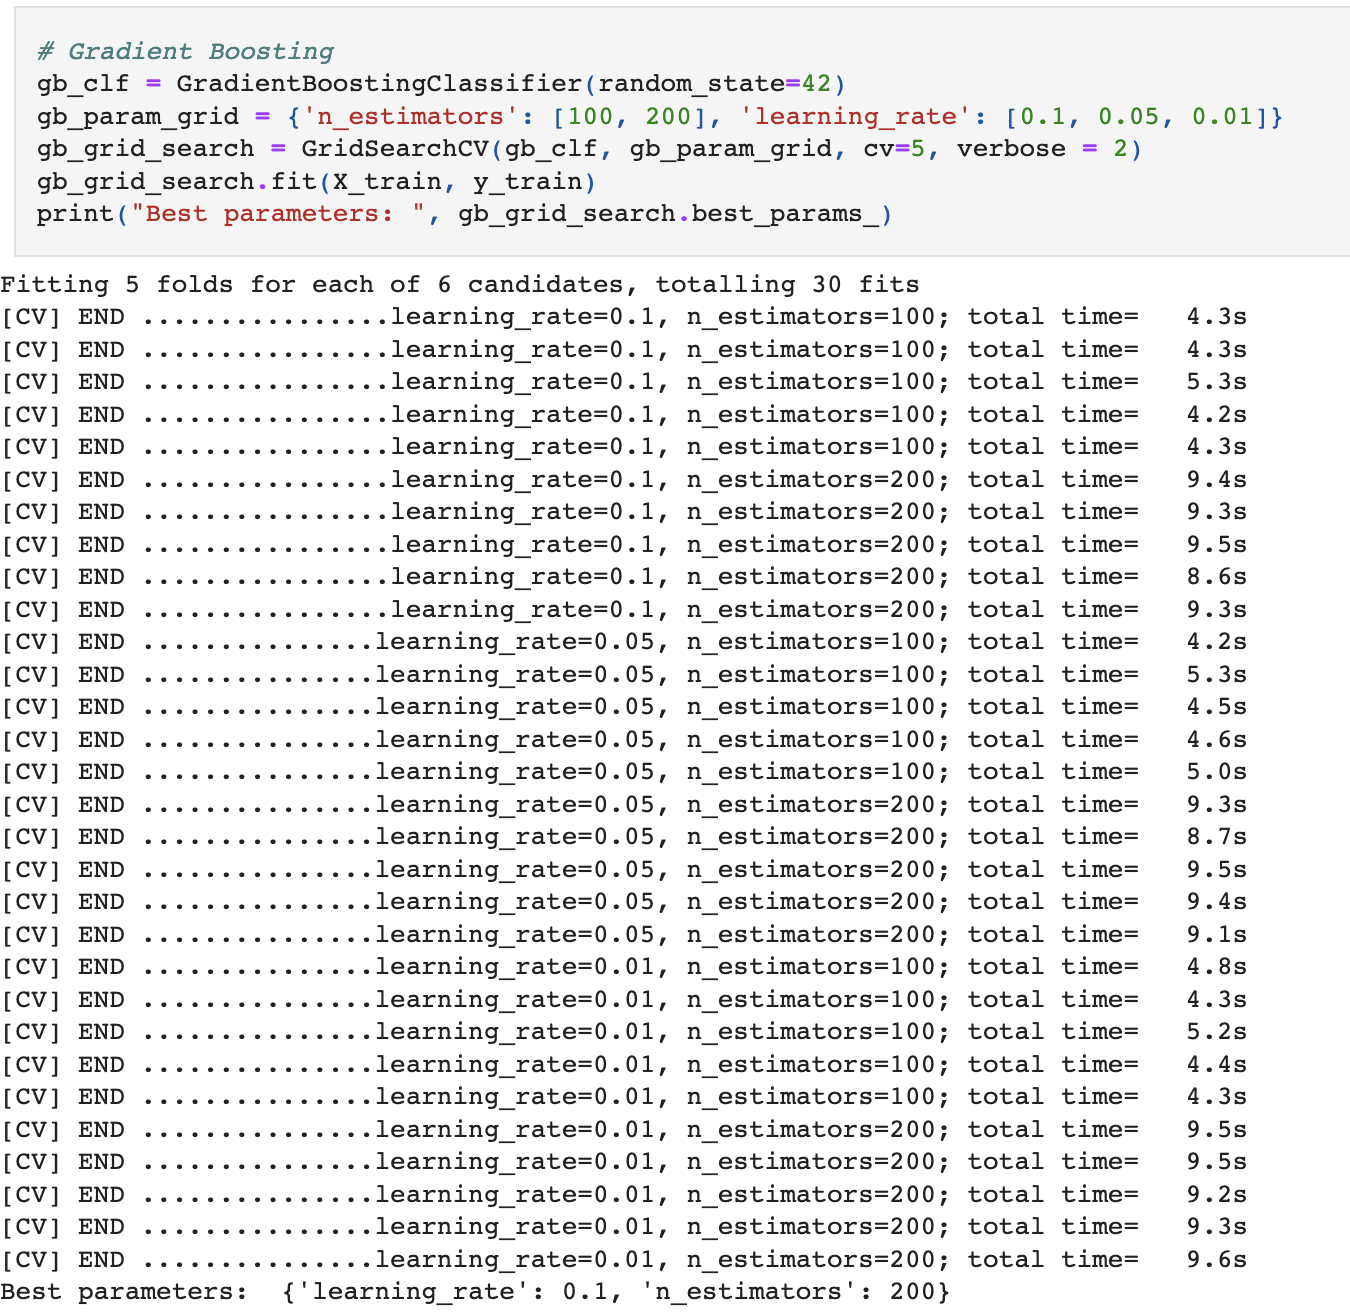<br>
We used grid seach cross validation to tune the parameters for our Gradient Boosting model, we checked for 3 different number of estimators, and 3 different learning rate. The best parameter is a learning rate of 0.1, and 200 estimators.
2. Classification Result<br>
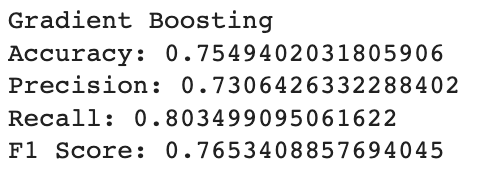<br>
As we can see, we had Gradient Boosting has the best performace as indicaated by the f1 score of 0.765. This is probably because Gradient Boosting is highly adaptive and can fit complex patterns in the data. It sequentially adds weak learners, focusing on the instances that were previously misclassified or have high residuals.
3. Confusion Matrix<br>
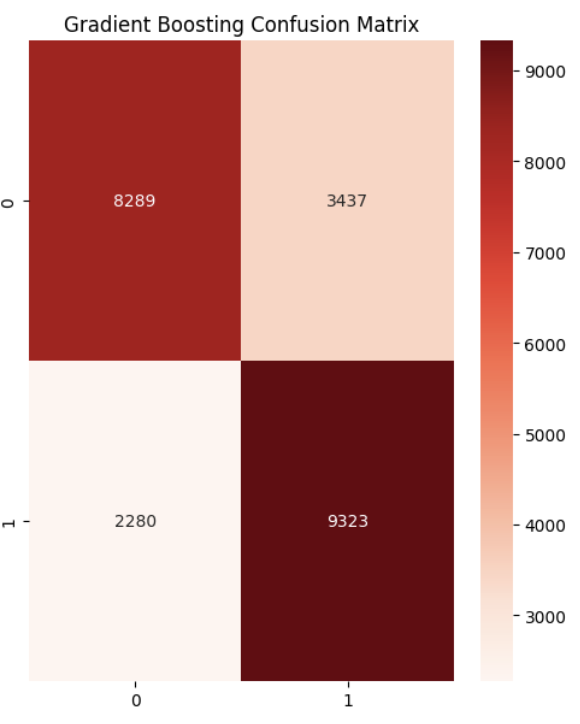<br>
As we can see in the matrix, although Gradient boosting has a little lower true positive labels compared to Random Forest and SVM, it have a much higher true negative labels and a higher f1 score.

# Discussion

### Interpreting the results:


1.   From above ML methods including: Random Forest, Gradient Boosting, SVM,Logistic Regression and Naïve Bayes, the overall accuracy is satisfactory, with a higher recall rate. These set of hyperparameters also lead to high false positive rate. However, since our group's goal is to classify diabetic patients from normal people, we focus on a higher recall rate. A higher recall rate means diabetic patients can be mostly distinguished and get treated as soon as possible. This prevents them from further potentially healthy issue. And all the algorithms above can do this classification with about 0.75 recall rate.
Random forest and gradient boosting did the best job in this classification, with 0.75 accuracy and 0.79 recall rate.<Br>
2.  On the other hand, the recall rate and accuracy for Naïve Bayes classifier is relatively low. This poor performance indicates that additional data and further hyper/parameters adjustments are needed. <Br>

3.  Overall, Random forest and gradient boosting are both good algorithm for diabetic classification.


### limitations

Based on our data processing above, we found out some potential limitations that our model is currently facing.

First of all, our model is based on a dataset of 70,000 observations. While this may seem extensive, the scope of diabetes across varying demographics and individual behaviors is vast. A larger dataset might capture more subtle variations that can enhance the accuracy of predictions. Our results, therefore, should be interpreted with caution when generalized to broader populations as it seems insufficient.

Secondly, our selection of variables used in the algorithm seems not specific enough in affecting individual disease such as diabete. We focused on six critical variables ('HighBP', 'CholCheck', 'BMI', 'HvyAlcoholConsump', 'GenHlth', 'Age') on the dataset. However, there are more complex health and lifestyle factors that can contribute to the onset of diabetes, such as genetic predisposition, mental stress, or sedentary behavior, which are not accounted for in the dataset.

Then, we might get an unexplored hyperparameter, and although we have tuned the hyperparameters to the best of our abilities, there are possibly more optimal configurations we have not explored due to time and computational constraints. As we learned in class about machine learning, model performance can often be significantly improved by fine-tuning hyperparameters.

Nonetheless, there exists a possibility of generating extrapolation conclusions. Given the size of the dataset, it is possible that outliers exist which could skew the results. While we made an effort to clean and normalize the data, the presence of such outliers could potentially influence our model's performance, which eventually caused extrapolation effects to happen.




### Ethics & Privacy

<b>Tracing Data Source</b> <br>
The data we will be using to construct the model is a cleaned dataset retrieved from Kaggle. To ensure reliability and address any potential ethical issue that might involve in this dataset, we traced its origin back to the Centers for Disease Control and Prevention (CDC). According to the acknowledgment section provided on Kaggle, the CDC released the original version of this dataset in 2015.

Based on the description on CDC's official site, the data within this dataset is collected through the Behavioral Risk Factor Surveillance System (BRFSS) questionnaire. BRFSS is a “health-related telephone survey that collects state data about U.S. residents regarding their health-related risk behaviors, chronic health conditions, and use of preventive services”, according to CDC.

<b>Potential Ethical Concern I: Unrepresentative Sampling Data</b> <br>
One of the ethical concerns related to health data-based machine learning algorithms is the use of unrepresentative samples. According to CDC, the survey data is mainly collected through telephone calls. We would concern data collected in this way might fail to represent people who are unable to answer phone calls due to various limitations. This limitation could arise from factors such as working hours, lacking access to telephones or cell phones, or other circumstances.

This exclusion may lead to a biased representation of certain demographics of the population. If the training data used for developing the algorithms is not a sufficient representation of the diverse population, it can lead to biased and inaccurate predictions. A recommendation suggested by such a biased algorithm could disproportionately affect certain demographic groups and cause healthcare disparities.

In the aim to prevent and address unintended consequences arising from unrepresentative samples, it is important to be transparent about our choice of data, the criteria for excluding or including certain data points, and the methods we used to construct the algorithm. We believe by revealing sufficient details to the public, we could help the public to make informed decisions when using our algorithm and interpreting the results it generates. Furthermore, by disclosing our modeling process and methodology, we invite feedback and criticism from the public and other stakeholders. In such a collaborative environment, we believe that potential issues could be identified more quickly, which allows improvements to be made more promptly.


<b>Potential Ethical Concern II: Model Fairness Across Groups</b> <br>
Another common concern for a machine learning algorithm is whether the model acts fairly across different groups. This issue may also lie in our model construction. Since the data we have chosen is from a single source, any misrepresentation within the data sampling could expose our model to the risk of overfitting. Therefore, before publishing the algorithm, it is important to test whether our model’s predictions are unbiased for any demographic or population group.
In addition to conducting thorough testing, we believe providing the public with our error metrics is necessary. In such a report, we should include metrics such as accuracy, false positive rate, and other relevant measure. By sharing this information, we aim to enhance public understanding of the characteristics and limitations inherent in our model.

<b>Potential Ethical Concern III: Transparency and Explainability</b> <br>
It is also important to ensure that our data is diverse, and free from biase. Therefore, in order to understand how the algorithm arrives at its predictions and classfication, we need to make sure the model interpretability and feature analysis could provide explnations for the algorithm's decisions, which can provide enough transparency in the our final decion making.


### Conclusion
The dataset used in this study is a clean dataset of 70,692 survey responses collected by the Centers for Disease Control and Prevention (CDC) in 2015. It includes 21 quantitative health indicators, such as BMI, high blood pressure, and high cholesterol, from both diabetic and non-diabetic individuals. By using feature selection to reduce noise in the dataset and utilizes machine learning models such as random forest, gradient boosting, support vector machine, logistic regression, and naive Bayes for classification, we found that the best models, gradient boosting and random forest models both achieved an accuracy of 0.75 and a recall rate of 0.79 in classifying diabetic patients, while random forest shows that fruits, doctor appointment affordability, health care coverage are the least impactful factors, while general health condition, blood pressure, BMI are the more impactful factors.

# Team Expectations

- The main communication channel for our team will be WeChat and Zoom. Each team member is expected to actively contribute to the group discussion and promptly confirm the availability for any meeting.
- Respecting each other is important. Each team member is expected to be inclusive and value any thought or concern others may have. If conflicting ideas emerge, be sure the discussion focuses on the issue rather than the person.
- Once a meeting schedule is set, each member of the team is expected to show up on time. However, we do understand that emergent situations may occur. In case of an unexpected not-showing-up, we expect each team member to inform each other at their earliest convenience.
- Each member is expected to contribute evenly to this project. If any member has concerns about fairness, open discussion is strongly encouraged. Our best hope is that any concern could be resolved within the team. However, if the issue couldn't be resolved on a team level, we would consult staff members as soon as possible.
- Merging different members' work into a single file on GitHub could be stressful. To prevent possible merging conflict, our team agrees to draft out the framework on Google Docs before pushing. Once all members have completed their part(s) on Google Docs, we would consider letting one member of the team push the content in Google Docs onto Github. This role may be designated to a single member throughout the quarter or a shifting role that each member takes turns doing.
- Although, for convenience, each member may have specialized responsibilities on different parts of the project, combining different sections of the project is a role that everybody shares. Each member is expected to take the responsibility of integrating their part(s) of the work into the group project, as well as reviewing and tuning the project before the final submission.
- Upon receiving a grade for a checkpoint or the project, some parts of the work may need further improvement. Although points might be deducted from some parts of the project but not others, everybody is responsible for the grade received since everyone has agreed before the final push. We encourage the member who contributed more to the parts where point(s) has been deducted to bring up ideas for revision (if given a chance). However, we agree that it is everyone’s responsibility to refine the work if we wish to improve the grade.


# Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 5/16  |  6:30 PM |  Brainstorm topics/questions, create shared google doc| Introduction, Discuss work separation, finding data, finding possible hypotheses based on data, sharing thoughts, making a schedule for following meetings. |
| 5/17  |  6:30 PM |  Read everyone’s writing | Double check everyone’s work and make sure no one has any problem. |
| 5/23  | 6:30 PM  | Check grades, and read comments  | Discuss if there’s any improvement need for the proposal.   |
| 5/29  | 7:00 PM  | Discuss specific norm and matrix we will use  | Clean the data and code, review our previous writing and modefy our project   |
| 5/30 | 6:30 PM  | Data cleaning | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 6/5 | 6:30 PM  | Complete analysis; Draft results/conclusion/discussion | Discuss/edit full project  |
| 6/12 | 8:00 PM  | Data analysis and matrix | Complete conclusion, limitation, abstract |
| 6/13 | 6:30 PM  | Complete conclusion, limitation, abstract | Go over the entire project and ready to submit |

# Footnotes

<a name="PharmEasy"></a>1.[^](#PharmEasy): “What Is the Chief Difference between People with Diabetes and People without Diabetes? What Is the Chief Difference between People with Diabetes and People without Diabetes?” PharmEasy Blog, 18 Aug. 2021, pharmeasy.in/blog/what-is-the-chief-difference-between-people-with-diabetes-and-people-without-diabetes/#:~:text=The%20chief%20difference%20is%20the,this%20is%20called%20insulin%20resistance.<br>

<a name="Saeedi"></a>2.[^](#Saeedi): Saeedi Pouya, et al. “Global and Regional Diabetes Prevalence Estimates for 2019 and Projections for 2030 and 2045: Results from the International Diabetes Federation Diabetes Atlas, 9th Edition.” Diabetes Research and Clinical Practice, 10 Sept. 2019, pubmed.ncbi.nlm.nih.gov/31518657/.<br>

<a name="Force"></a>3.[^](#Force): US Preventive Services Task Force. “USPSTF RECOMMENDATION: Screening for Prediabetes and Type 2 Diabetes.” JAMA, 24 Aug. 2021, jamanetwork.com/journals/jama/fullarticle/2783414.<br>
